In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import scipy.stats as st
sns.set_context('notebook')
plt.style.use('seaborn')
style = {
    'figure.figsize': (12, 8),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 14,
}
rcParams.update(style)
import pymc3 as pm

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
data = pd.read_table('OGLE-LMC-DSCT-0001.I.dat', sep='\s+', names=['MJD', 'I', 'dI'])

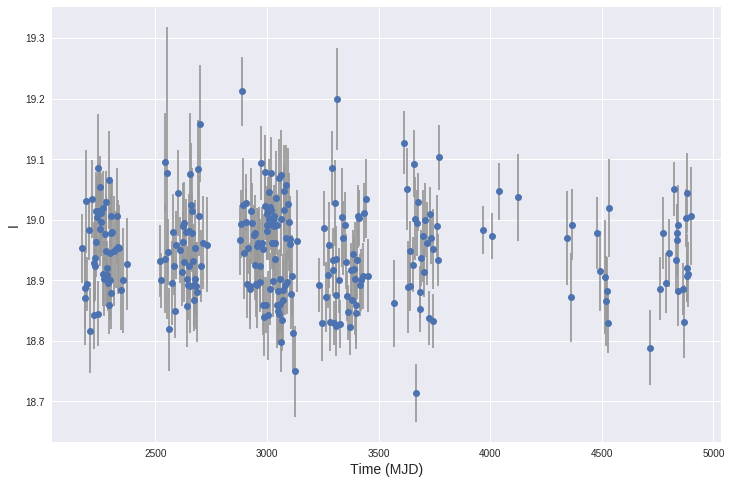

In [4]:
plt.errorbar('MJD', y='I', yerr='dI', data=data, ecolor='.6', fmt='o')
plt.xlabel('Time (MJD)')
plt.ylabel('I')

In [5]:
from astropy.stats import LombScargle
frequency, power = LombScargle(data['MJD'], data['I']).autopower()

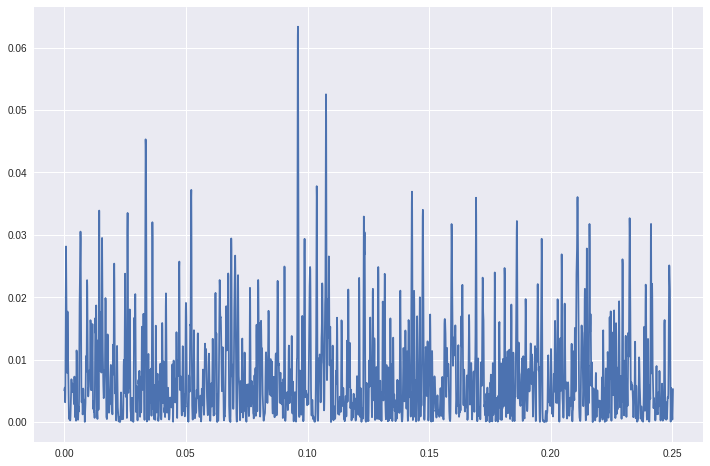

In [59]:
plt.plot(frequency, power)

In [60]:
fdata = np.repeat(frequency, power)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [38]:
def sinc(x, w, d = 0):
    out = []
    for xi in x:
        if xi == 0:
            out.append(1)
        else:
            out.append(np.sin(w * xi - d) / (w * xi - d))
    return np.array(out)

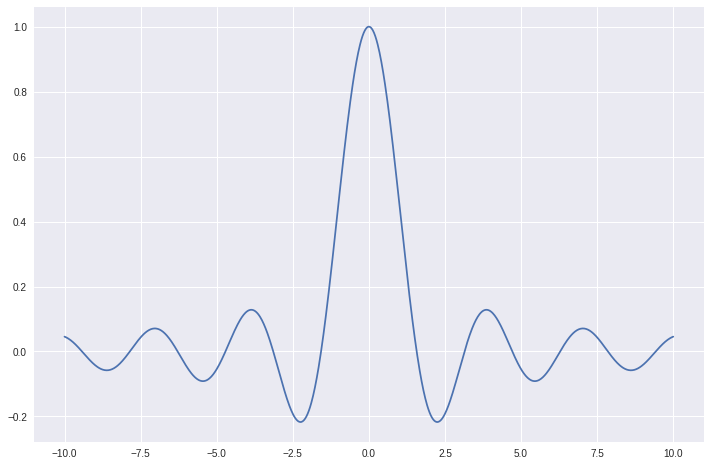

In [39]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, sinc(x, 2))

In [27]:
def unif(x):
    out = []
    for xi in x:
        if xi < 0 or xi > 5:
            out.append(0)
        else:
            out.append(1)
    return np.array(out)

In [40]:
with pm.Model() as model:
    mu = pm.Normal('mu', 0, sd=10)
    s = pm.HalfCauchy('s', 10)
    
    y = pm.Laplace('obs', mu, s, observed=power)

In [42]:
with model:
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s_log__, mu]
100%|██████████| 2000/2000 [00:01<00:00, 1226.72it/s]


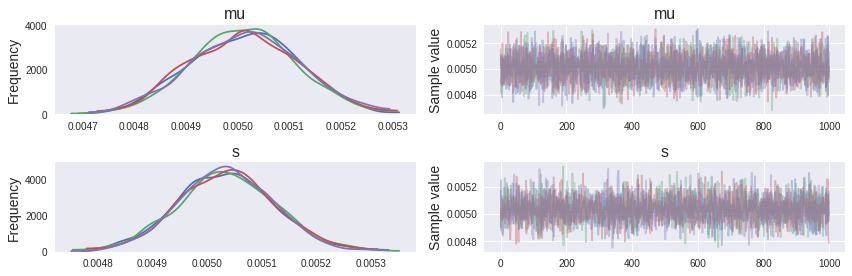

In [44]:
pm.traceplot(trace);

In [58]:
ppc = pm.sample_ppc(trace, 1000, model)
post = ppc['obs'].mean()

100%|██████████| 1000/1000 [00:00<00:00, 8262.07it/s]


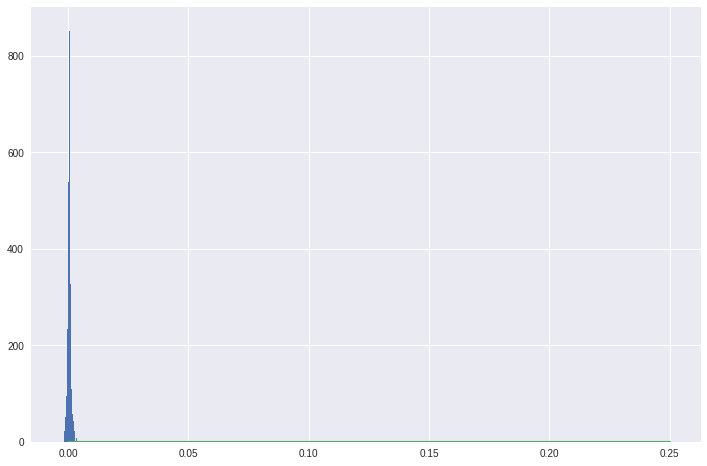

In [57]:
plt.axvline
plt.plot(frequency, power);